# <font color='blue'>Projeto de Business Analytics - Defeitos de Fabricação em Garrafas de Vidro</font>
## <font color='blue'>Base de dados de 480.000 registros</font>
### <font color='blue'>Objetivo:</font>
#### <font color='blue'>Criar um modelo de Machine Learning que propoe a estabilidade e melhoria do defeito de fabricação 'Parede Fina' Mínimo de 1,10mm</font>
#### <font color='blue'>Variáveis disponíveis para estudo: espessura da parede, temperatura da gota, temperatura da forma, pressão de trabalho, temperatura da archa de recozimento, produto aprovado e número da secção</font>
#### <font color='blue'>O modelo proposto indicará quais variáveis influenciarão e provocarão os defeitos e poderá ser utilizado das seguinte formas:</font>
- Utilizado em um dashboard, em tempo real, na área quente, onde o indicativo de parede fina influenciará a intervenção do operador da máquina IS.
- Ou como automação, servindo de base a um software que manipulará diretamente o sistema da máquina IS para regulagem das variáveis.

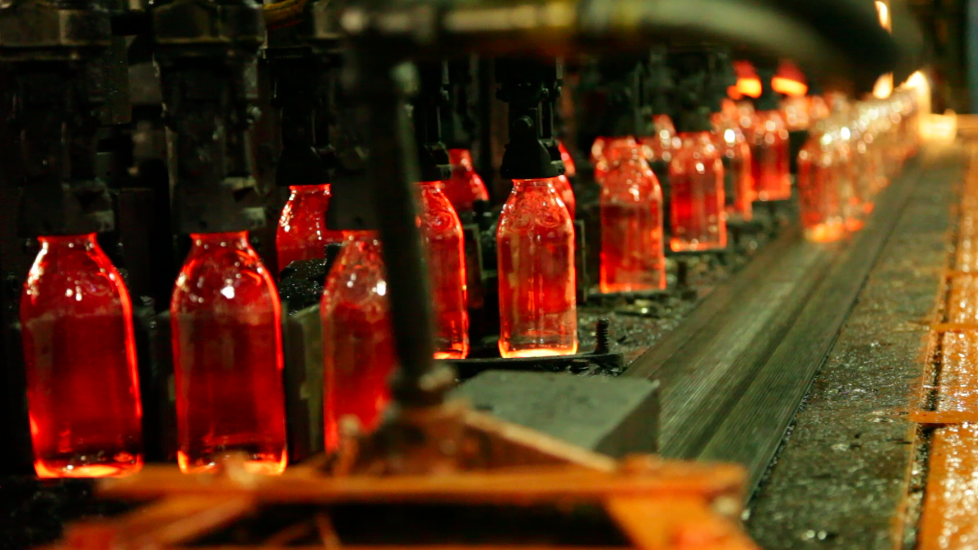

In [1]:
from IPython.display import Image
Image('dados/garrafa.png')

In [2]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Machine learning 
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions


# importar os módulos de sistema
import math
import sys, os


# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

Author: Data Science Academy

statsmodels: 0.13.5
scipy      : 1.10.0
numpy      : 1.23.5
sys        : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
matplotlib : 3.7.1
pandas     : 1.5.3
plotly     : 5.9.0
sklearn    : 1.1.0
seaborn    : 0.12.2



## <font color='blue'>Análise Exploratória</font>

In [3]:
# importar Dataset
df = pd.read_csv('dados/dataset1.csv')

In [4]:
df.shape

(480000, 7)

In [5]:
# visualizar de amostra dos dados
df.sample(10)

,espessura,temp_gota,temp_forma,pressao,temp_archa,aprovado,molde
37108,1.058663,813.842539,312.481540,102.338495,197.713736,0,2
341039,1.209971,824.208262,314.910682,103.640490,218.615022,1,12
9203,1.243501,826.736062,316.997048,104.358190,214.530098,1,1
910,1.120620,819.150117,310.507738,106.417058,200.260241,1,1
49764,1.123469,819.483196,313.896413,102.001036,205.936184,1,2
90585,1.167510,818.396520,311.933719,105.462246,212.254233,1,4
188460,1.258556,834.697758,313.596828,104.802947,209.129083,1,7
52999,1.189252,823.245847,313.680046,106.275487,211.197751,1,2
400708,1.121518,816.275547,318.113783,101.062532,207.319072,1,14
26287,1.115560,821.615921,313.027544,101.917126,206.688715,1,1


In [6]:
# tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 0 to 479999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   espessura   480000 non-null  float64
 1   temp_gota   480000 non-null  float64
 2   temp_forma  480000 non-null  float64
 3   pressao     480000 non-null  float64
 4   temp_archa  480000 non-null  float64
 5   aprovado    480000 non-null  int64  
 6   molde       480000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 25.6 MB


In [7]:
# dados numericos
df_num = list(df.columns[0:5])
df_num

['espessura', 'temp_gota', 'temp_forma', 'pressao', 'temp_archa']

In [8]:
# dados categoricos
df_cat = list(df.columns[5:])
df_cat

['aprovado', 'molde']

In [9]:
# Criando tabelas de frequências
for coluna in df_cat:
    # criando a tabela de frequência para a coluna atual
    freq_table = pd.DataFrame({'Freq. Absoluta': df[coluna].value_counts(dropna=False).fillna('NA'),
                               'Freq. Relativa': (df[coluna].value_counts(normalize=True, dropna=False) * 100).fillna('NA').round(1),
                               'Freq. Acumulada': (df[coluna].value_counts(normalize=True, dropna=False).cumsum() * 100).fillna('NA').round(1)})
    
    # imprimindo a tabela de frequência
    print(f'Tabela de Frequência - variável: {coluna}\n{"-"*70}\n{freq_table}\n{"-"*70}\n\n')

Tabela de Frequência - variável: aprovado
----------------------------------------------------------------------
   Freq. Absoluta  Freq. Relativa  Freq. Acumulada
1          445269            92.8             92.8
0           34731             7.2            100.0
----------------------------------------------------------------------


Tabela de Frequência - variável: molde
----------------------------------------------------------------------
    Freq. Absoluta  Freq. Relativa  Freq. Acumulada
1            30000             6.2              6.2
2            30000             6.2             12.5
3            30000             6.2             18.8
4            30000             6.2             25.0
5            30000             6.2             31.2
6            30000             6.2             37.5
7            30000             6.2             43.8
8            30000             6.2             50.0
9            30000             6.2             56.2
10           30000             

In [10]:
# Medidas de resumo em colunas numéricas
df[df_num].describe()

,espessura,temp_gota,temp_forma,pressao,temp_archa
count,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000
mean,1.170036,823.533518,313.252976,104.341912,210.491709
std,0.048004,5.239615,3.131317,2.150474,7.355945
min,0.948964,799.396205,298.129926,94.427222,178.474252
25%,1.137678,819.995938,311.143041,102.892160,205.533223
50%,1.170040,823.532622,313.256085,104.339320,210.482028
75%,1.202472,827.065441,315.367308,105.791610,215.454276
max,1.401662,847.184428,328.355701,114.325215,242.998836


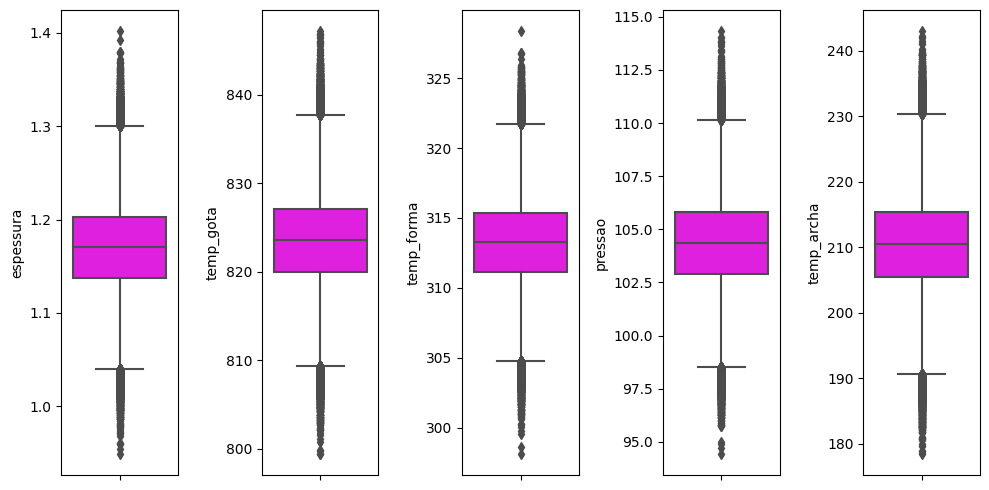

In [11]:
# Boxplots em colunas numéricas
features = df_num
plt.figure(figsize = (10, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

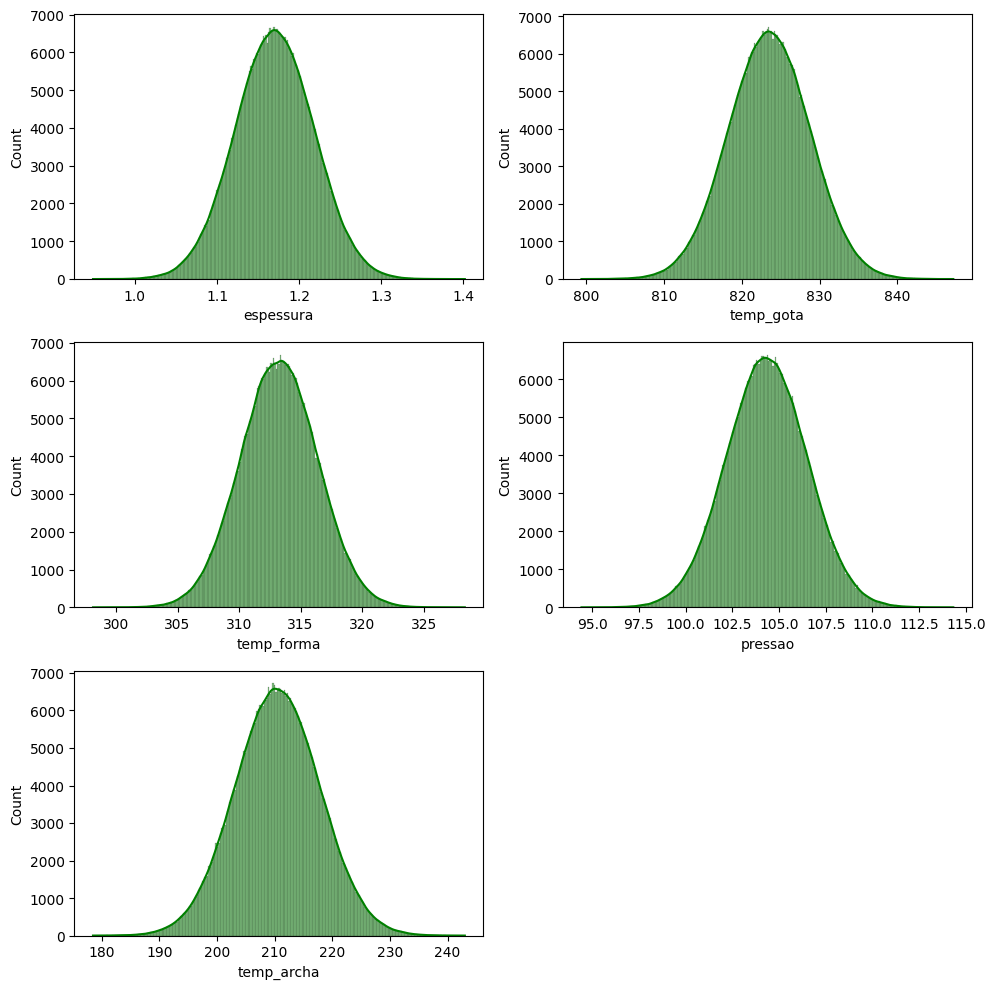

In [12]:
# Histogramas em colunas numéricas
features = df_num
plt.figure(figsize = (10, 10))
for i in range(len(features)):
    plt.subplot(3, len(features)//2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
plt.tight_layout()

In [13]:
# teste de checagem de distribuições normais
for i in df_num:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar p-valor
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

espessura : Distribuição Normal
temp_gota : Distribuição Normal
temp_forma : Distribuição Normal
pressao : Distribuição Normal
temp_archa : Distribuição Normal


In [14]:
# Correlação variáveis numéricas
df[df_num].corr()

,espessura,temp_gota,temp_forma,pressao,temp_archa
espessura,1.000000,0.610428,0.427007,0.318278,0.350410
temp_gota,0.610428,1.000000,-0.004522,0.000503,0.000191
temp_forma,0.427007,-0.004522,1.000000,-0.003610,0.001594
pressao,0.318278,0.000503,-0.003610,1.000000,-0.000586
temp_archa,0.350410,0.000191,0.001594,-0.000586,1.000000


<Figure size 1500x1500 with 0 Axes>

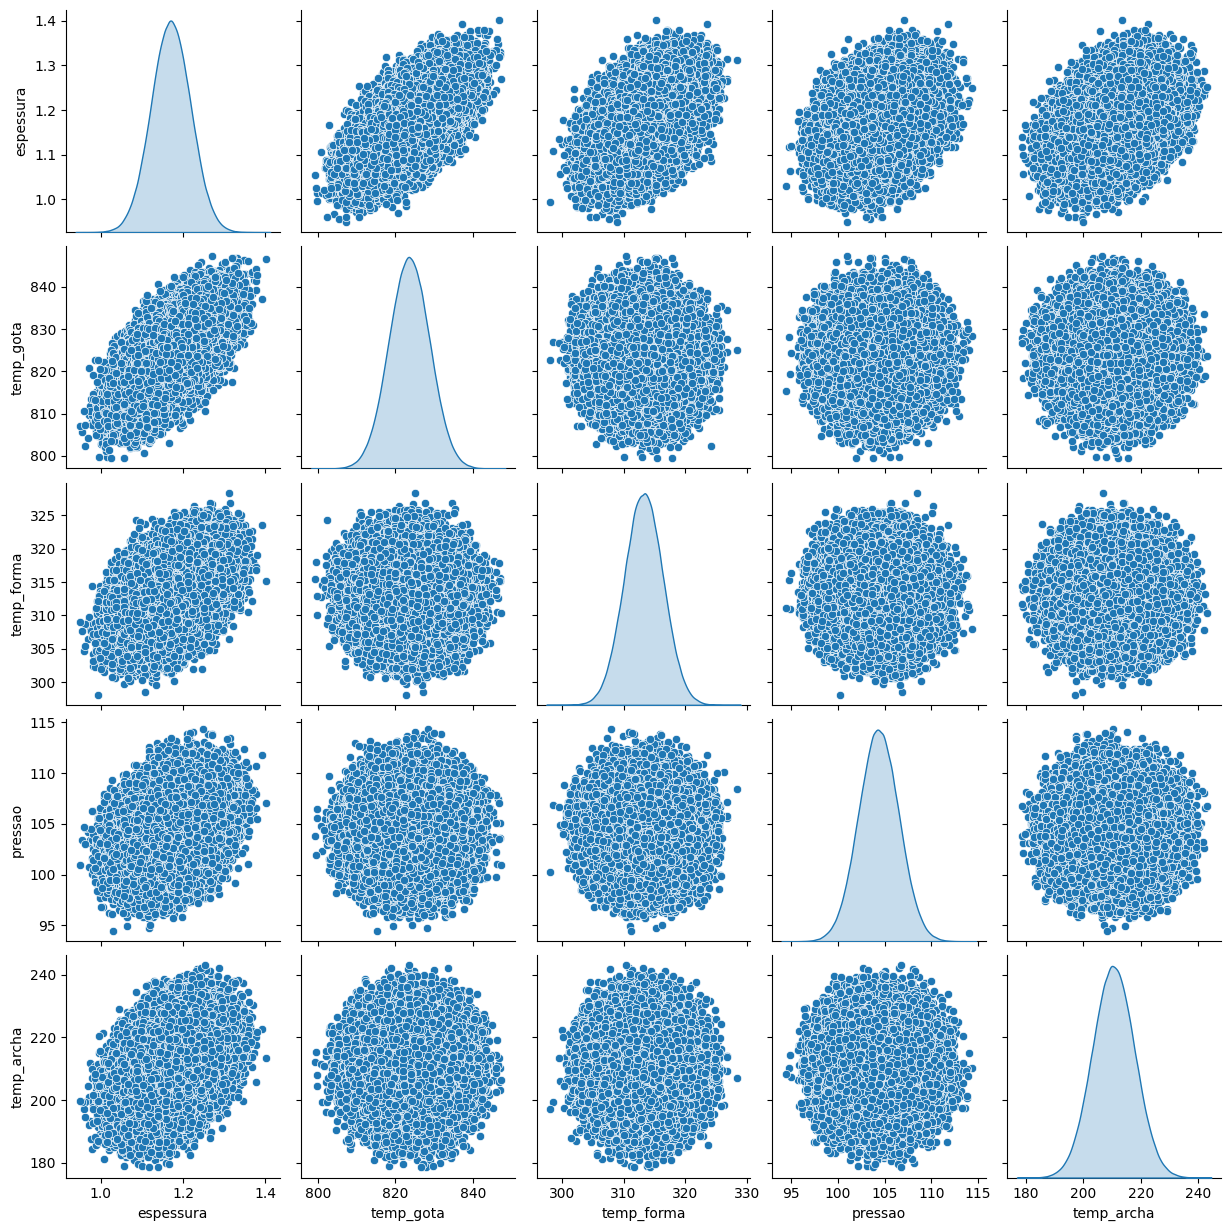

In [15]:
# Heatmap Correlação variáveis numéricas
plt.figure(figsize = (15, 15))
sns.pairplot(df[df_num], diag_kind = 'kde');

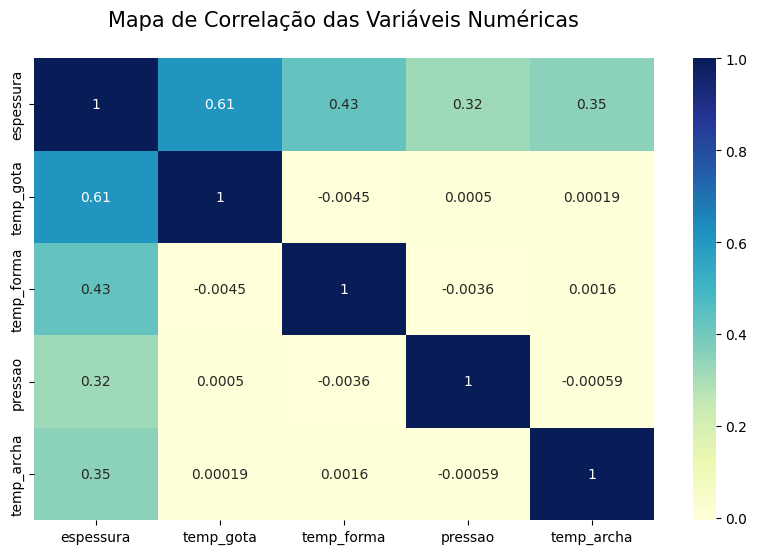

In [16]:
# Mapa Correlação variáveis numéricas
plt.figure(figsize = (10,6))
sns.heatmap(df[df_num].corr(), annot = True, cmap = 'YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize = 15)
plt.show()

In [17]:
# IV - Information Value das variáveis categóticas
# Loop
for i in df_cat:
    
    df_ln_odds_iv = (pd.crosstab(df[i], df['aprovado'], normalize = 'columns')
                 .assign(ln_odds = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['ln_odds'] * (dfx[1]-dfx[0]))))
    
    print('Information Value (IV):')
    print(f'{df_ln_odds_iv}\n{"-"*65}\n')

Information Value (IV):
aprovado    0    1  ln_odds   iv
aprovado                        
0         1.0  0.0     -inf  inf
1         0.0  1.0      inf  inf
-----------------------------------------------------------------

Information Value (IV):
aprovado         0         1   ln_odds        iv
molde                                           
1         0.063661  0.062409 -0.019851  0.000428
2         0.062682  0.062486 -0.003131  0.000428
3         0.061703  0.062562  0.013832  0.000428
4         0.061300  0.062594  0.020888  0.000428
5         0.062970  0.062463 -0.008073  0.000428
6         0.062135  0.062528  0.006318  0.000428
7         0.062279  0.062517  0.003824  0.000428
8         0.063200  0.062445 -0.012012  0.000428
9         0.059457  0.062737  0.053704  0.000428
10        0.062682  0.062486 -0.003131  0.000428
11        0.063517  0.062421 -0.017407  0.000428
12        0.060580  0.062650  0.033597  0.000428
13        0.063488  0.062423 -0.016917  0.000428
14        0.062768

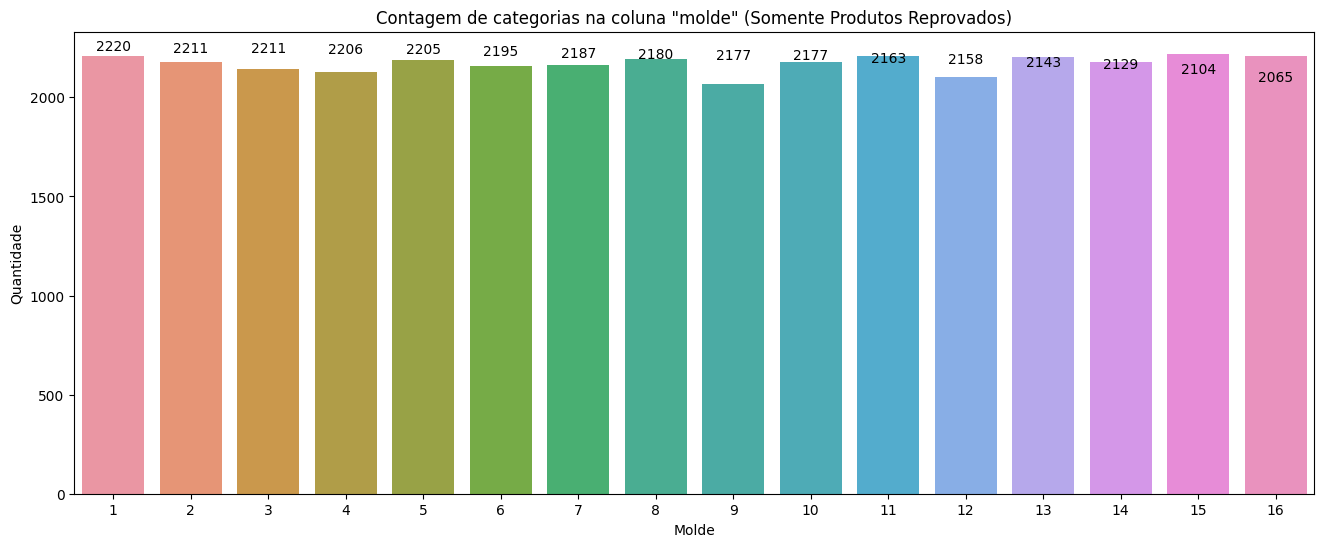

In [18]:
# Checar distribuição das reprovas entre os moldes

plt.figure(figsize=(16, 6))

# Filtrar o DataFrame pela categoria 0 da coluna 'aprovado'
filtered_df = df[df['aprovado'] == 0]

# Contar a quantidade de categorias na coluna 'molde'
counts = filtered_df['molde'].value_counts()

# Criar o gráfico de barras usando Seaborn
sns.countplot(data=filtered_df, x='molde')

# Personalizar o gráfico
plt.xlabel('Molde')
plt.ylabel('Quantidade')
plt.title('Contagem de categorias na coluna "molde" (Somente Produtos Reprovados)')

# Adicionar valores acima de cada barra
for index, value in enumerate(counts):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# Exibir o gráfico
plt.show()

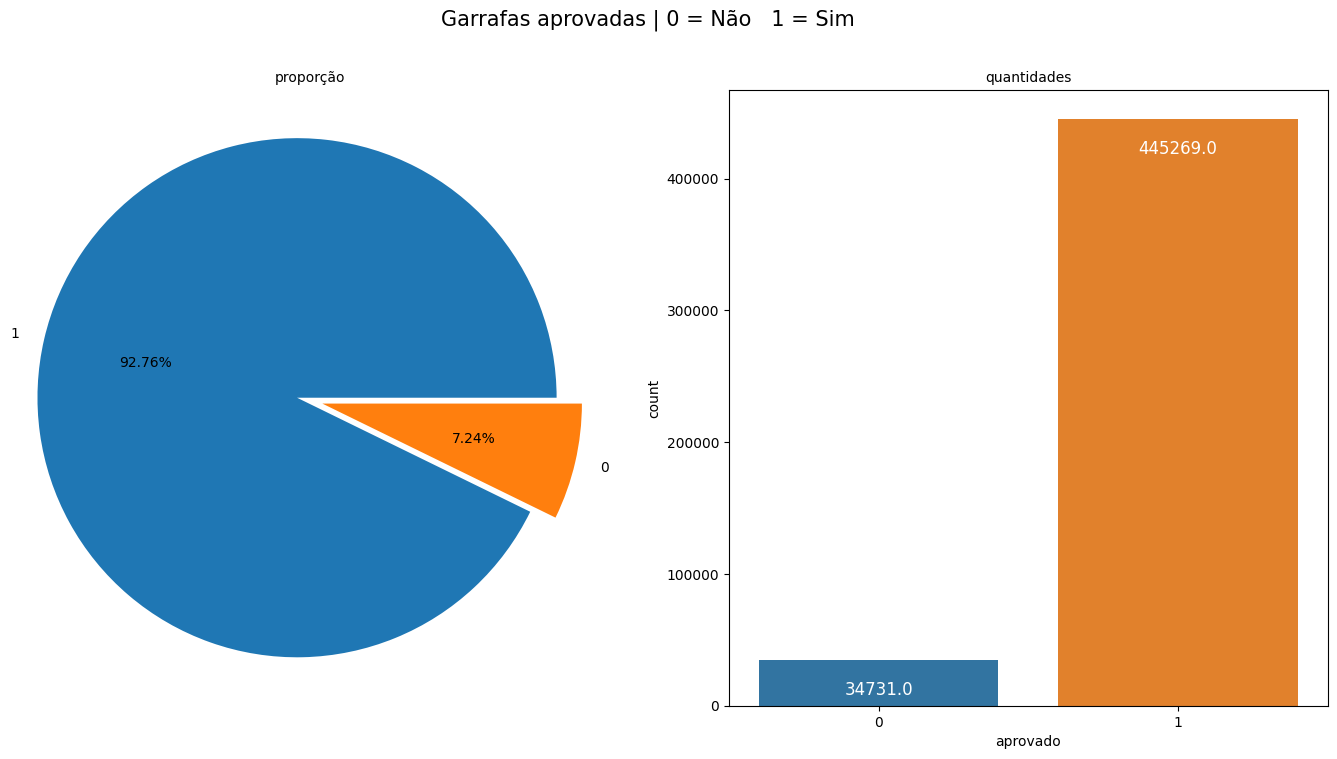

In [19]:
# Verificar o equilíbrio entre as garrafas aprovadas e reprovadas

# Figura
plt.figure(figsize = (17,8))

# Título principal
plt.suptitle('Garrafas aprovadas | 0 = Não   1 = Sim', fontsize = 15)

plt.subplot(121)

plt.pie(round(df['aprovado'].value_counts() / len(df) * 100, 2),
        labels = list(df['aprovado'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("proporção", size = 10)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'aprovado')
plt.title("quantidades", fontsize = 10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

## <font color='blue'>Parecer preliminar</font>

Quanto aos dados:
- Sem valores ausentes, com boa qualidade da coleta
- Valores numéricos em forma normal, que facilita o algorítimo de ML
- Classes categóricas com baixa, ou quase nenhuma influência na variabilidade
- Desequilíbrio importante entre as categorias da variável 'aprovado'
- Correlação praticamente nula entre as variáveis numéricas, desconsiderando a variável espessura
- Variáveis com maiores correlações com a variável das espessuras:
    - temp_gota:  0.61
    - temp_forma: 0.43

Construção do modelo:
- Descartar variáveis categóricas
- Desenvolver estatísticas e testes importância de variáveis
- Descartar mais variáveis se for o caso
- Modelo de regressão linear
- Variável target será a variável 'espessura'

## <font color='blue'>Desenvolvimento do Modelo com Machine Learning</font>
### <font color='blue'>Análise Estatística das Variáveis Numéricas</font>

In [20]:
## Iniciando o trabalho de Pré-Processamento
df.head()

,espessura,temp_gota,temp_forma,pressao,temp_archa,aprovado,molde
0,1.134189,824.263319,311.212995,101.065363,206.849216,1,1
1,1.106902,815.280897,310.837755,105.349291,212.221175,1,1
2,1.254478,825.975440,312.482098,108.453269,213.905909,1,1
3,1.248219,828.836946,312.256146,106.292034,214.632587,1,1
4,1.184678,824.720465,313.028271,107.403106,199.727372,1,1


In [21]:
# coletando x e y
x_stats = df.iloc[:,1:5]
y_stats = df['espessura'].values

In [22]:
# variáveis explicativas
x_stats.head()

,temp_gota,temp_forma,pressao,temp_archa
0,824.263319,311.212995,101.065363,206.849216
1,815.280897,310.837755,105.349291,212.221175
2,825.975440,312.482098,108.453269,213.905909
3,828.836946,312.256146,106.292034,214.632587
4,824.720465,313.028271,107.403106,199.727372


In [23]:
# variável target
y_stats

array([1.13418933, 1.10690216, 1.25447784, ..., 1.08752353, 1.14029525,
       1.22530018])

In [24]:
# treinando modelo para dados estatísticos
xc = sm.add_constant(x_stats)
modelo_stats = sm.OLS(y_stats, xc)
modelo_v1 = modelo_stats.fit()

In [25]:
# estatísitcas do treino
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 4.299e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        12:00:21   Log-Likelihood:             1.1418e+06
No. Observations:              480000   AIC:                        -2.284e+06
Df Residuals:                  479995   BIC:                        -2.283e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7405      0.006  -1067.646      0.000      -6.753      -6.728
temp_gota      0.0056   6.18e-06    907.862      0.000       0.006       0.006
temp_forma     0.0066   1.03e-05    638.271      0.000       0.007       0.007
pressao        0.0071   1.51e-05    474.184      0.000       0.007       0.007
temp_archa     0.0023    4.4e-06    518.777      0.000       0.002       0.002
==============================================================================
Omnibus:                        0.546   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.544
Skew:                          -0.003   Prob(JB):                        0.762
Kurtosis:                       3.001   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <font color='blue'>Parecer das estatísticas</font>

- R-quadrado de praticamente 0.782 indica boa explicabilidade das variáveis em relação à espessura da parede da garrafa
- O ideal seria próximo de 0.9 a 1.0, então, precisaríamos encontrar mais variáveis explicativas
- O P-valor, tanto geral quanto individual indica que as variáveis, apesar de baixo, ainda sim ajuda explicar a espessura da parede dos produtos
- Não descartar nenhuma variável para treinar modelo de Machine Learning. Todas serão importantes.

### <font color='blue'>Treinar modelo com sklearn</font>

In [26]:
# Divisão em dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_stats, y_stats, test_size=0.2)

In [27]:
# Cria o modelo de Machine Learning
modelo_sk = LinearRegression(normalize = False, fit_intercept = True)

In [28]:
# Treina o modelo
modelo_v2 = modelo_sk.fit(x_treino, y_treino)

In [29]:
modelo_v2

LinearRegression(normalize=False)

In [30]:
# Confirmando R2 do modelo
r2_score(y_teste, modelo_v2.fit(x_treino, y_treino).predict(x_teste))

0.7824841019222999

In [31]:
# imprimindo o intercepto do modelo (B0)
print("Intercepto:", modelo_v2.intercept_)

Intercepto: -6.737002062038048


In [32]:
# imprimindo os coeficiente do modelo (B1, B2, B3 e B4)
print("Coeficientes:", modelo_v2.coef_)

Coeficientes: [0.00560576 0.00659404 0.00713771 0.00228107]


In [33]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, modelo_v2.coef_), df.columns[1:5]), reverse = True):
    print ("%1f %s" % (coef,var))

0.007138 pressao
0.006594 temp_forma
0.005606 temp_gota
0.002281 temp_archa


In [34]:
df.sample(5)

,espessura,temp_gota,temp_forma,pressao,temp_archa,aprovado,molde
141839,1.247018,832.946650,316.617793,102.239064,216.897261,1,5
397915,1.167449,820.040091,315.010749,104.371811,210.929344,1,14
214367,1.078381,820.805400,308.971565,99.941831,205.468263,0,8
463825,1.151279,821.537777,311.183641,106.016701,205.045393,1,16
2413,1.123228,821.726795,314.295166,103.273331,209.310955,1,1


In [35]:
# Simular uma provável espessura de parede da garrafa com os valores abaixo
TEMP_GOTA = 810
TEMP_FORMA = 310
PRESSAO = 110
TEMP_ARCHA = 230
SECAO = 16

# Lista com os valores das variáveis
dados_var = [TEMP_GOTA, TEMP_FORMA, PRESSAO, TEMP_ARCHA]

# Reshape
xp = np.array(dados_var).reshape(1, -1)

# Previsão
print("\n")
print("__________________DASHBOARD__________________\n\n")
print("Espessura da parede da garrafa:", modelo_v2.predict(xp))
print("\n")
print("Secção:", SECAO)
print("\n")
print("Temperatura da Gota:", TEMP_GOTA)
print("\n")
print("Temperatura da Forma:", TEMP_FORMA)
print("\n")
print("Pressão de Trabalho:", PRESSAO)
print("\n")
print("Temperatura da Archa:", TEMP_ARCHA)
print("\n")



__________________DASHBOARD__________________


Espessura da parede da garrafa: [1.157608]


Secção: 16


Temperatura da Gota: 810


Temperatura da Forma: 310


Pressão de Trabalho: 110


Temperatura da Archa: 230




## <font color='blue'>Parecer final</font>
- Reafirmamos objetivo principal que é prever valores de espessura de parede da garrafa
- Os valores dos coeficientes e intercepto são os valores do modelo a ser utilizado, independente da finalidade, se é visualização em dashboard ou software automatizado
- Claro que, conforme explicado no parecer das estatísticas, esse modelo necessita de mais variáveis para explicar melhor a espessura das paredes dos produtos

# Fim